This is a jupyter notebook to show the fitting of chemical shift, R1_eff, R2_eff, and 
DOSY data for 5-fluoroindole interacting with various concentrations of NS5A-D2D2.
  
We assume a simple two-site exchange model between free (F) and bound (B) 5-fluoroindole:

  F<-->B

where kforward  (-->) = kon * [P] and kbackward (<--) = koff.

Executing all cells in ../19F_1D/ ../19F_R1eff/ ../19F_R2eff/ will output dictionaries containing data to various json files in ../json, which can be combined into a single input data file for this analysis using ../json/write_file.ipynb. The resulting file, data.inp, will be written to this directory.

This code calls analyse.py and fns_Tc_Kd.py, which contain further explanation of the analysis.


Useful references:

  1) Vallurupalli, Notes on Chemical Exchange, 2009.
  
  2) Cavanaugh, et al, Protein NMR Spectroscopy: Principles and Practice, 2006.
  
  3) Pages et al, Suppressing magnetization exchange effects in stimulated-echo 
     diffusion experiments, Journal of Magnetic Resonance, 2013.
     
  4) Bain and Duns, A unified approach to dynamic NMR based on a physical 
     interpretation of the transition probability, Canadian Journal of Chemistry, 1996.
     
  5) Lu et al, 19F Magic Angle Spinning NMR Spectroscopy and Density 
     Functional Theory Calculations of Fluorosubstituted Tryptophans: Integrating Experiment 
     and Theory for Accurate Determination of Chemical Shift Tensors, Journal of Physical 
     Chemistry B, 2018.
    
  6) Lu et al, 19F NMR relaxation studies of fluorosubstituted tryptophans, Journal of 
     Biomolecular NMR, 2020.


In [1]:
# Import useful things
from IPython.display import Image
%matplotlib inline

In [2]:
# Run script, print out fitted parameters

# Params:
# kd is the binding affinity in M
# koff is the dissociation rate constant in s-1
# DeltaOmega is the difference in the 19F chemical shift between the free and bound state in ppm
# tcf is the rotational correlation time (tau_c) of the free state in ns
# tcf is the rotational correlation time (tau_c) of the bound state in ns

%run analyse.py

 ====== First fitting with kon = 3.3e6 M-1s-1 ====== 
# Chi-squared:     27.6394420452756
# Red-Chi-squared: 1.316163906917886
# koff          9.070761e+02 +/-  3.438620e+02
# DeltaOmega    1.763470e-02 +/-  4.521434e-03
# tcf           2.697599e-02 +/-  1.245346e-03
# tcb           4.699303e-02 +/-  1.038130e-02
# Db            1.500296e-09 +/-  6.467270e-10
#
# Correlation Matrix 
# 1.000  0.994  0.261  0.405 -0.011 
# 0.994  1.000  0.268  0.373 -0.011 
# 0.261  0.268  1.000 -0.556 -0.003 
# 0.405  0.373 -0.556  1.000 -0.004 
#-0.011 -0.011 -0.003 -0.004  1.000 
 Running chi-squared surface ...  DONE 
 ====== Final fitting with kon from minimum ====== 
 kon =  2.846319e+06 
 koff =  9.000850e+02 
 kd =  3.162278e-04 
# Chi-squared:     27.516853567927615
# Red-Chi-squared: 1.3758426783963806
# kd            2.639110e-04 +/-  1.065397e-04
# koff          7.671779e+02 +/-  5.304899e+02
# DeltaOmega    1.624333e-02 +/-  6.104757e-03
# tcf           2.695174e-02 +/-  1.278878e-03
# tcb  

<Figure size 432x288 with 0 Axes>

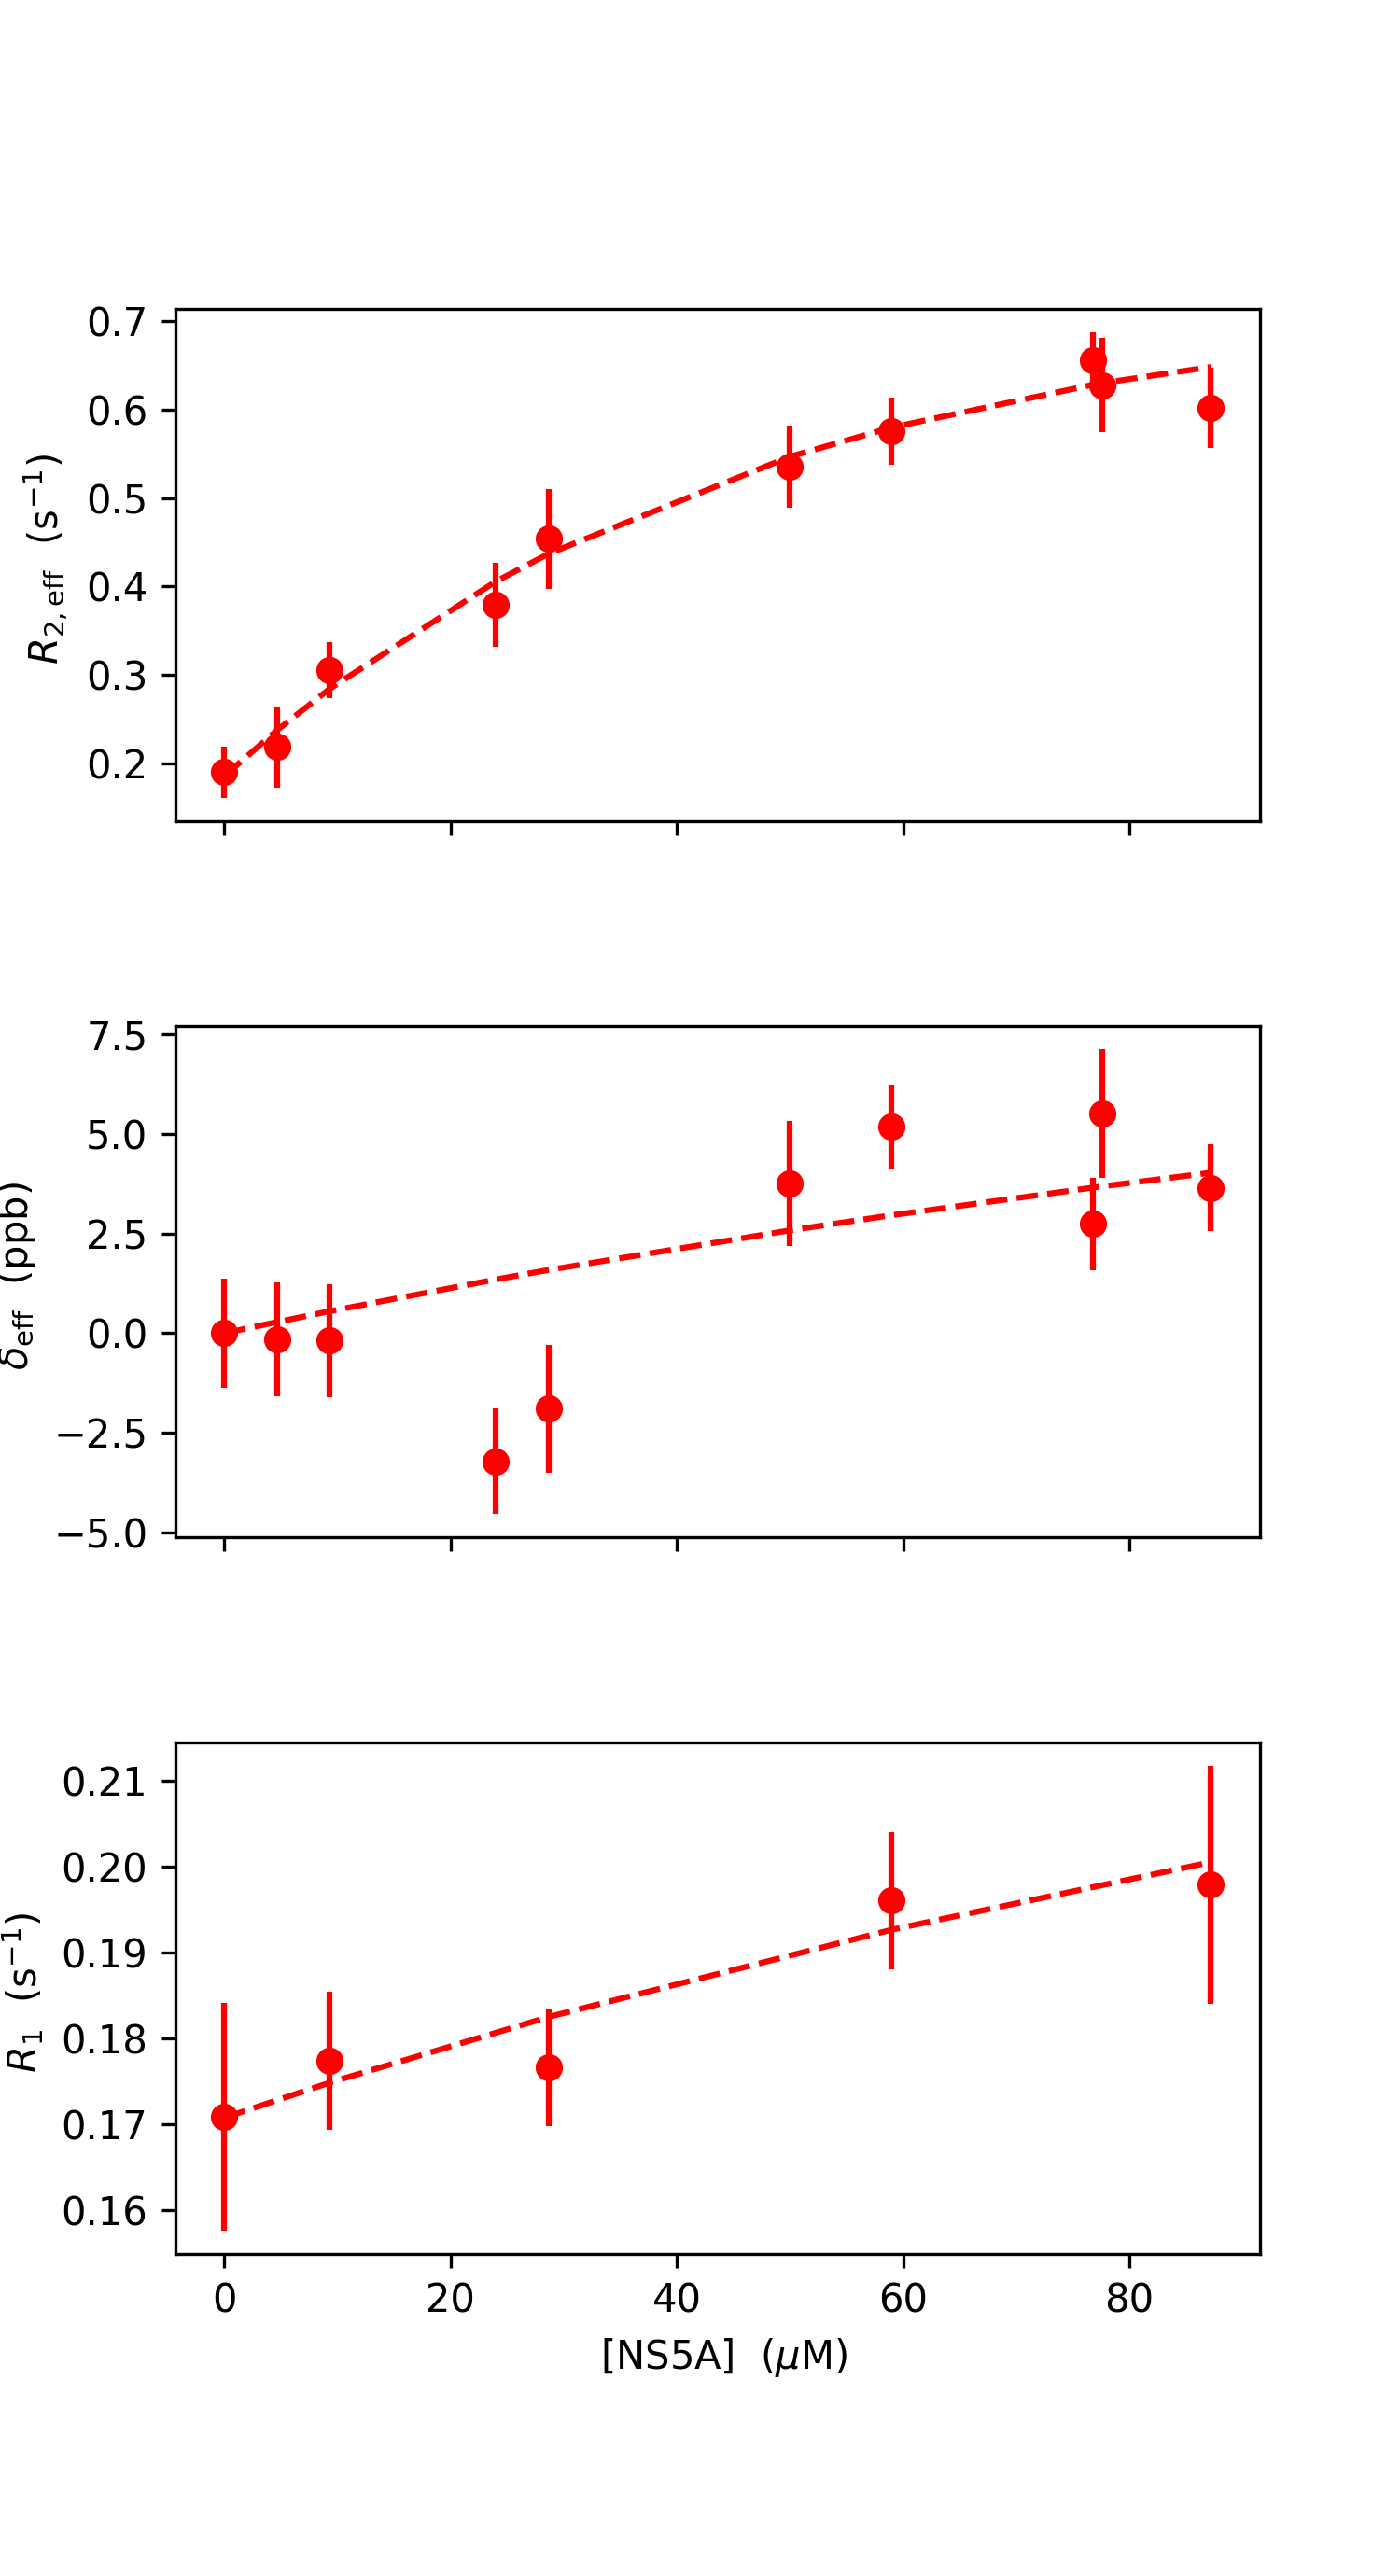

In [3]:
# Plot fits with data (points) and fit (dashed line)
Image(filename="exp_vs_fit.png", width=500, height=500)

In [4]:
# Load in data from Chi2 fits
Chi2_2 = np.loadtxt('Chi2_kds_tauc.txt')
kds = np.loadtxt('kds_tauc.txt')
koffs = np.loadtxt('koffs_tauc.txt')
taucbs = np.loadtxt('taucbs.txt')

# Make lists 
x_list=[]
y_list=[]
z_list=[]
for kd in kds:
    for koff in koffs:
        for taucb in taucbs:
            x_list.append(kd)
            y_list.append(koff)
            z_list.append(taucb)

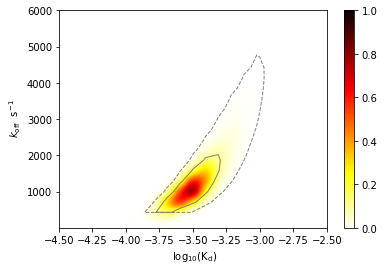

In [5]:
# Plot normalized probability surfaces as functions of K_d and k_off 
# Note that the x-axis is log10 scale

chi2_2d_kd_koff = []
for i,kd in enumerate(kds):
    for j,koff in enumerate(koffs):
        chi2_2d_kd_koff.append(Chi2_2.reshape(21,21,21).T[:,j,i].min())
        
best_idx = np.argmin( Chi2_2 )

norm_max = np.exp( -np.asarray(chi2_2d_kd_koff).reshape(21,21).T-np.min(np.asarray(chi2_2d_kd_koff))/(2)).max()
plt.imshow(np.exp( -np.asarray(chi2_2d_kd_koff).reshape(21,21).T-np.min(np.asarray(chi2_2d_kd_koff))/(2))/norm_max, cmap='hot_r', \
            extent=(np.min(np.log10(kds)),np.max(np.log10(kds)),np.min(koffs),np.max(koffs)),\
            aspect='auto', 
            origin='lower',
            interpolation='quadric')
plt.colorbar()

plt.contour((np.asarray(chi2_2d_kd_koff).reshape(21,21).T-np.min(np.asarray(chi2_2d_kd_koff))), \
            origin='lower', \
            extent=(np.min(np.log10(kds)),np.max(np.log10(kds)),np.min(koffs),np.max(koffs)),\
            colors=['grey','grey'], linestyles=['solid','dashed'], \
            levels=[2.30, 6.18], linewidths=[1,1] ) # For two variables 1 sigma at 2.30, 2 sigma at 6.18

plt.xlabel(r' log$_{10}({\rm K}_{\rm d})$')
plt.ylabel(r' $k_{\rm off}$  s$^{-1}$')

plt.show()

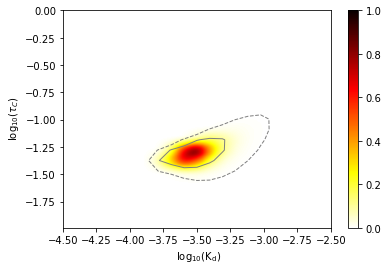

In [6]:
# Plot normalized probability surfaces as functions of K_d and tau_c
# Note that the x- and y-axes are log10 scale

chi2_2d_kd_tauc = []
for i,kd in enumerate(kds):
    for t,tauc in enumerate(taucbs):
        chi2_2d_kd_tauc.append(Chi2_2.reshape(21,21,21).T[t,:,i].min())
        
best_idx = np.argmin( Chi2_2 )

norm_max = np.exp( -np.asarray(chi2_2d_kd_tauc).reshape(21,21).T-np.min(np.asarray(chi2_2d_kd_tauc))/(2)).max()

plt.imshow(np.exp( -np.asarray(chi2_2d_kd_tauc).reshape(21,21).T-np.min(np.asarray(chi2_2d_kd_tauc))/(2))/norm_max, \
           cmap='hot_r', \
           extent=(np.min(np.log10(kds)),np.max(np.log10(kds)),np.min(np.log10(taucbs)),np.max(np.log10(taucbs))),\
           aspect='auto', 
           origin='lower',
           interpolation='quadric')
plt.colorbar()

plt.contour((np.asarray(chi2_2d_kd_tauc).reshape(21,21).T-np.min(np.asarray(chi2_2d_kd_tauc))), \
           origin='lower', \
           extent=(np.min(np.log10(kds)),np.max(np.log10(kds)),np.min(np.log10(taucbs)),np.max(np.log10(taucbs))),\
           colors=['grey','grey'], linestyles=['solid','dashed'], \
           levels=[2.30, 6.18], linewidths=[1,1] ) # For two variables 1 sigma at 2.30, 2 sigma at 6.18

plt.xlabel(r' log$_{10}({\rm K}_{\rm d})$')
plt.ylabel(r' log$_{10}(\tau_{C})$')
plt.show()

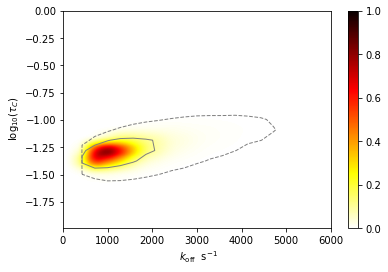

In [7]:
# Plot normalized probability surfaces as functions of k_off and tau_c
# Note that the y-axis is log10 scale

chi2_2d_koff_tauc = []
for j,koff in enumerate(koffs):
    for t,tauc in enumerate(taucbs):
        chi2_2d_koff_tauc.append(Chi2_2.reshape(21,21,21).T[t,j,:].min())
        
best_idx = np.argmin( Chi2_2 )

norm_max = np.exp( -np.asarray(chi2_2d_koff_tauc).reshape(21,21).T-np.min(np.asarray(chi2_2d_koff_tauc))/(2)).max()

plt.imshow(np.exp( -np.asarray(chi2_2d_koff_tauc).reshape(21,21).T-np.min(np.asarray(chi2_2d_koff_tauc))/(2))/norm_max, \
           cmap='hot_r', \
           extent=(0,np.max(koffs),np.min(np.log10(taucbs)),np.max(np.log10(taucbs))), \
           aspect='auto', 
           origin='lower',
           interpolation='quadric')
plt.colorbar()

plt.contour((np.asarray(chi2_2d_koff_tauc).reshape(21,21).T-np.min(np.asarray(chi2_2d_koff_tauc))), \
            origin='lower', \
            extent=(0,np.max(koffs),np.min(np.log10(taucbs)),np.max(np.log10(taucbs))), \
            colors=['grey','grey'], linestyles=['solid','dashed'], \
            levels=[2.30, 6.18], linewidths=[1,1] ) # For two variables 1 sigma at 2.30, 2 sigma at 6.18

plt.xlabel(r' $k_{\rm off}$  s$^{-1}$')
plt.ylabel(r' log$_{10}(\tau_{C})$')

plt.show()